# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [29]:
# Melakukan import library

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from IPython.core.pylabtools import figsize
from scipy.sparse import data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [30]:
# Membaca dataset transasi bank dari lokal dan menampilkan data pada 5 baris pertama

bank_transactions_df = pd.read_csv("Dataset_inisiasi.csv")
bank_transactions_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [31]:
# Menampilkan ringkasan informasi dari dataset
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [32]:
# Menampilkan statistik deskriptif dari dataset untuk semua kolom (numerik dan kategorial)
bank_transactions_df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00363,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [33]:
# Mengecek jumlah nilai yang hilang di setiap kolom
missing_values = bank_transactions_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [60]:
# Melihat jumlah perangkat per IP Address
bank_transactions_df.groupby(by="IP Address")["DeviceID"].nunique().sort_values(ascending=False)

IP Address
200.136.146.93    13
49.31.186.82      11
147.119.62.178    10
166.79.195.157    10
9.230.41.239      10
                  ..
110.243.14.36      1
85.191.79.161      1
80.247.6.83        1
80.58.55.129       1
81.156.221.124     1
Name: DeviceID, Length: 592, dtype: int64

In [59]:
# Melihat jumlah transaksi per IP Address
bank_transactions_df.groupby(by="IP Address")["TransactionID"].nunique().sort_values(ascending=False)

IP Address
200.136.146.93    13
49.31.186.82      11
9.230.41.239      10
147.119.62.178    10
173.135.78.201    10
                  ..
92.90.132.79       1
80.247.6.83        1
80.58.55.129       1
81.156.221.124     1
102.203.223.1      1
Name: TransactionID, Length: 592, dtype: int64

In [65]:
# Melihat jumlah transaksi per akun
bank_transactions_df.groupby(by="AccountID")["TransactionID"].nunique().sort_values(ascending=False)

AccountID
AC00362    12
AC00363    12
AC00202    12
AC00460    12
AC00225    11
           ..
AC00476     1
AC00486     1
AC00104     1
AC00406     1
AC00008     1
Name: TransactionID, Length: 495, dtype: int64

In [67]:
# Melihat selisih transaksi saat ini dan sebelumnya
transaction_time = bank_transactions_df["PreviousTransactionDate"] - bank_transactions_df["TransactionDate"]

transaction_time = transaction_time.apply(lambda x: round(x.total_seconds() / 86400)) # hours

transaction_time

0       573
1       496
2       483
3       549
4       385
       ... 
2507    558
2508    593
2509    441
2510    619
2511    629
Length: 2512, dtype: int64

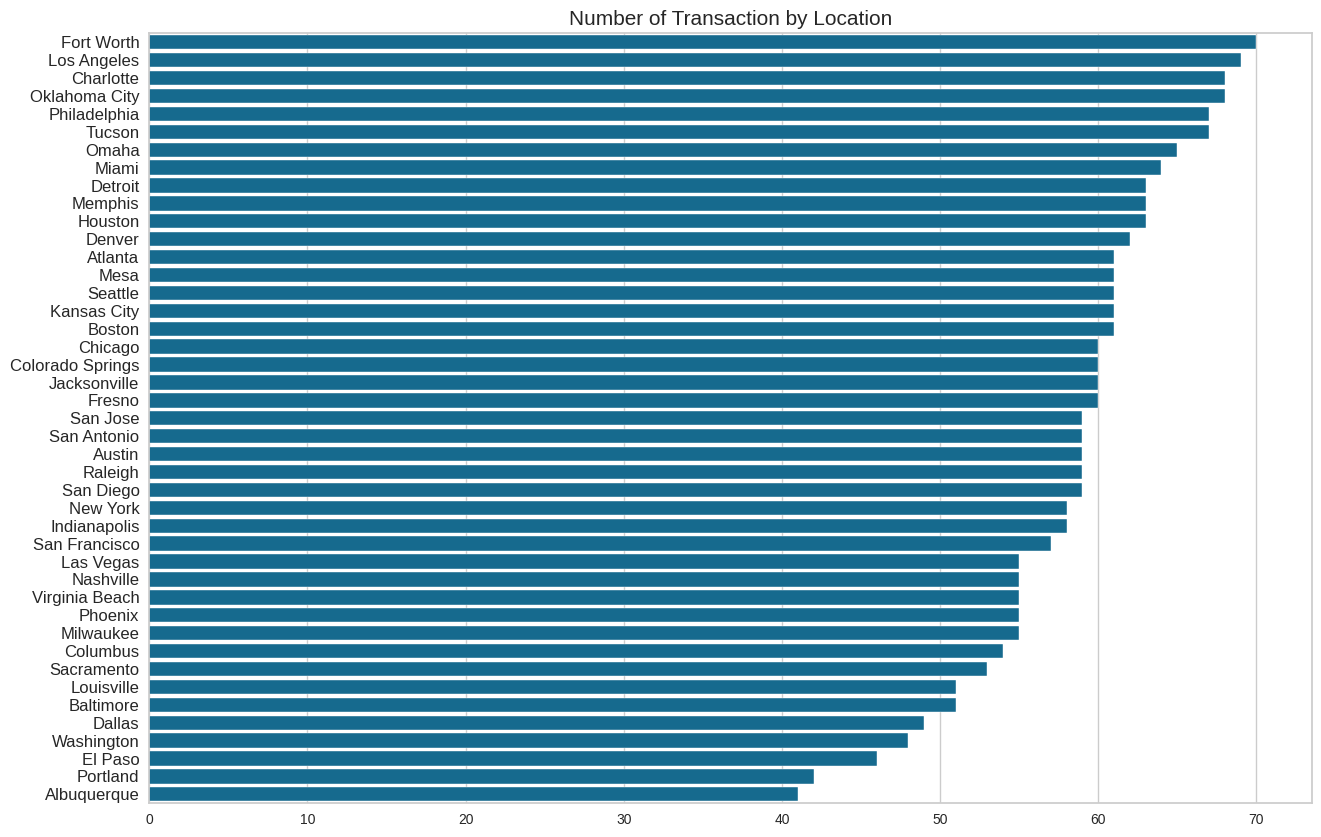

In [107]:
# Melihat demografi transaksi berdasarkan lokasi
bylocation_df = bank_transactions_df.groupby(by="Location")["TransactionID"].nunique().reset_index()

bylocation_df.rename(columns={
    "TransactionID": "TransactionCount"
}, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(
    x="TransactionCount",
    y="Location",
    data=bylocation_df.sort_values(by="TransactionCount", ascending=False)
)

plt.title("Number of Transaction by Location", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

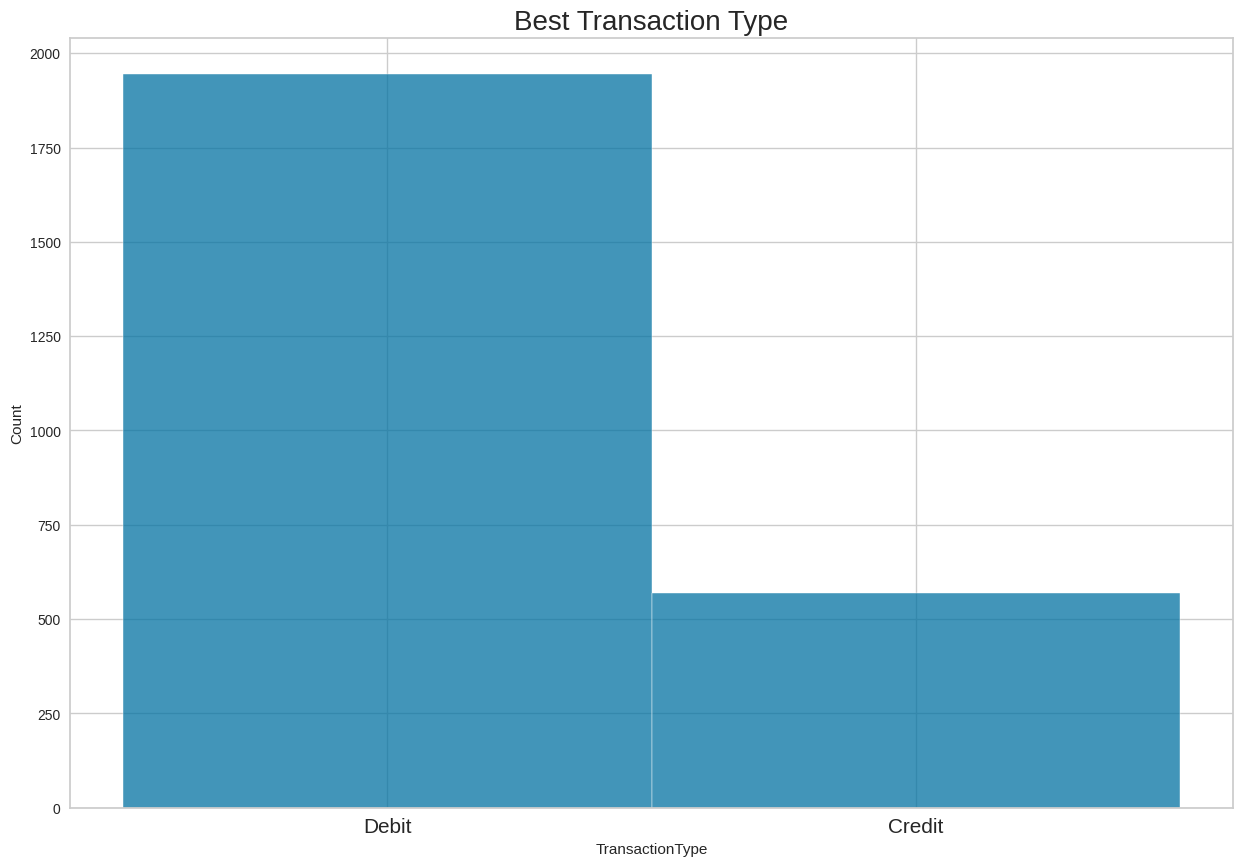

In [111]:
# Melihat jenis transaksi yang sering digunakan
plt.figure(figsize=(15, 10))
sns.histplot(x="TransactionType", data=bank_transactions_df)

plt.title("Best Transaction Type", fontsize=20)
plt.tick_params(axis="x", labelsize=15)
plt.show()

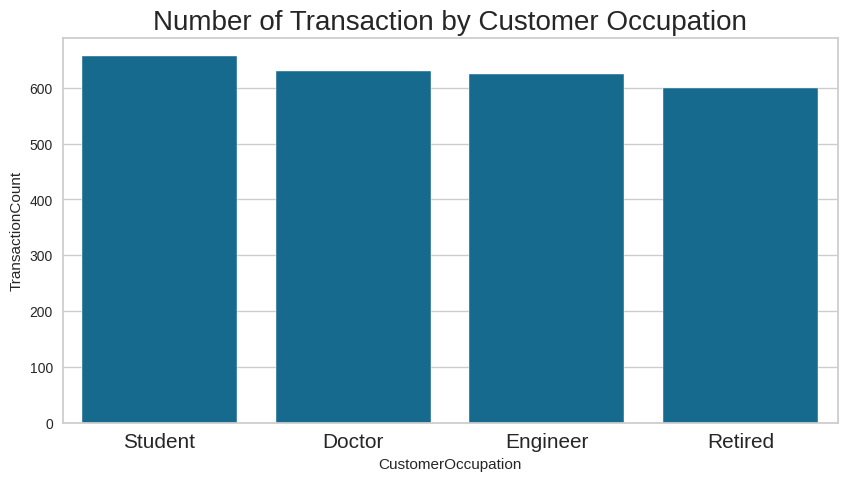

In [124]:
# Melihat demografi jumlah transaksi berdasarkan pekerjaan
byoccupation_df = bank_transactions_df.groupby(by="CustomerOccupation")["TransactionID"].nunique().reset_index()
byoccupation_df.rename(columns={
    "TransactionID": "TransactionCount"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="TransactionCount",
    x="CustomerOccupation",
    data=byoccupation_df.sort_values(by="TransactionCount", ascending=False)
)

plt.title("Number of Transaction by Customer Occupation", loc="center", fontsize=20)
plt.tick_params(axis="x", labelsize=15)

plt.show()

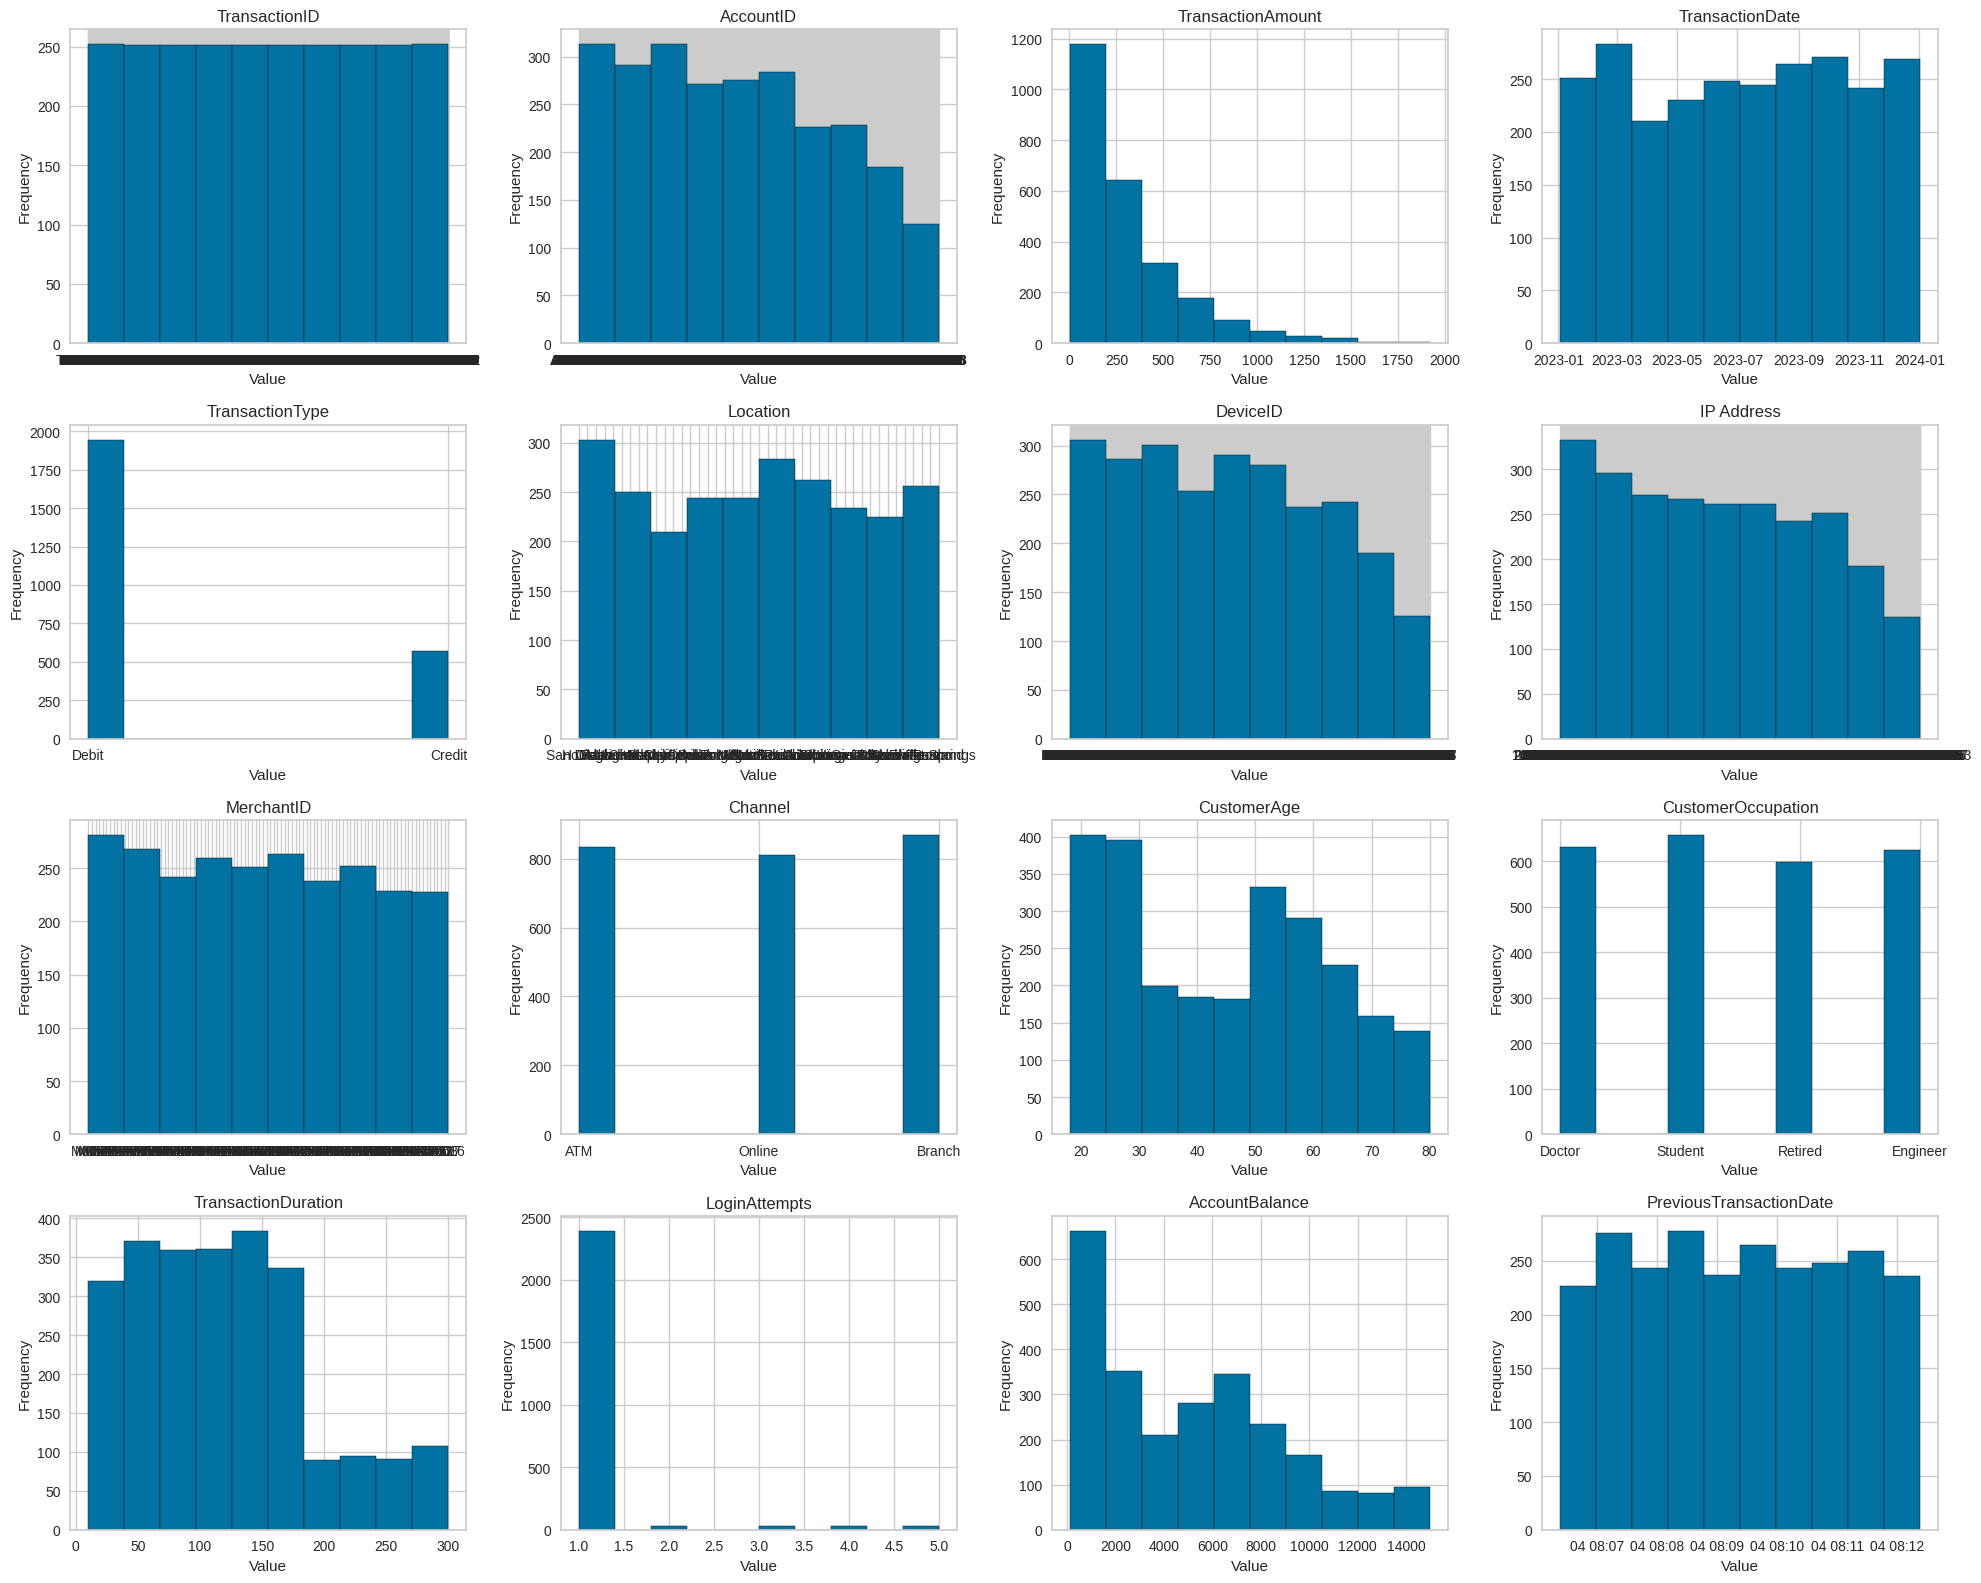

In [68]:
# Menghitung jumlah variabel
num_vars = bank_transactions_df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(bank_transactions_df.columns):
    bank_transactions_df[column].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai jika ada
for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

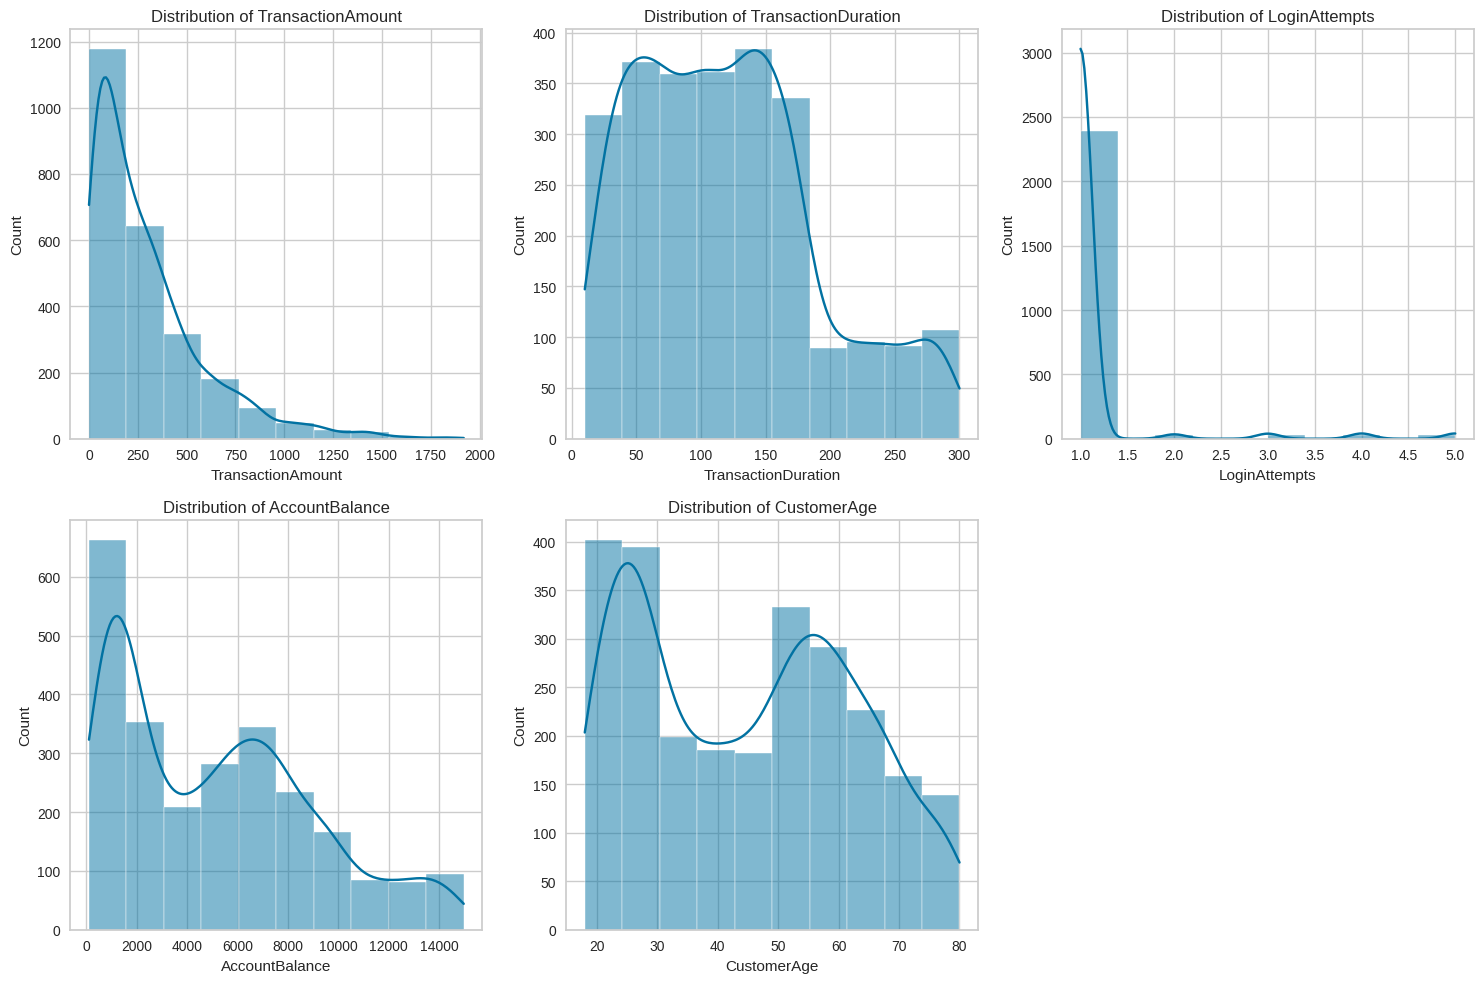

In [54]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

def plot_histogram(columns, title=None):
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(bank_transactions_df[column], kde=True, bins=10)
        plt.title((title, f'Distribution of {column}')[title is None])

    plt.tight_layout()
    plt.show()

plot_histogram(columns_to_plot)

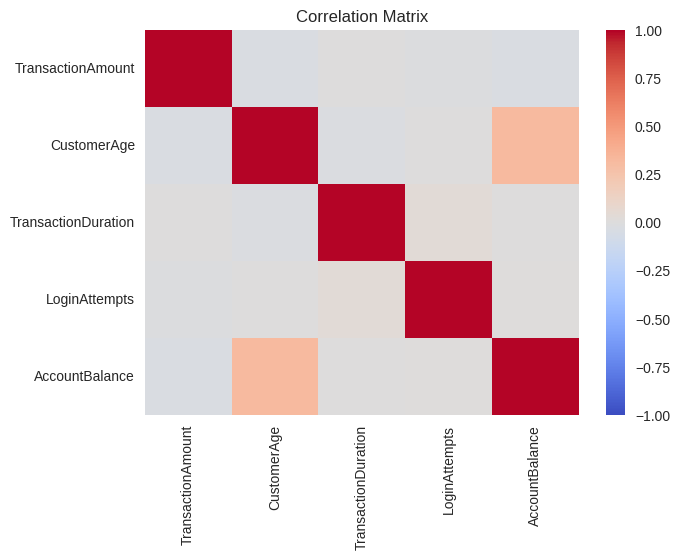

In [55]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(7, 5))
correlation_matrix = bank_transactions_df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [37]:
# Mengecek apakah ada data kosong
bank_transactions_df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [38]:
# Mengecek apakah ada data yang duplikat
print("Jumlah data duplikat: ", bank_transactions_df.duplicated().sum())

Jumlah data duplikat:  0


In [39]:
# Memerika tipe data dan jumlah data pada dataset
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [40]:
# Mengubah tipe data pada kolom TransactionDate dan  PreviousTransactionDate menjadi datetime
datetime_columns = ['TransactionDate', 'PreviousTransactionDate']

for column in datetime_columns:
    bank_transactions_df[column] = pd.to_datetime(bank_transactions_df[column])

bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

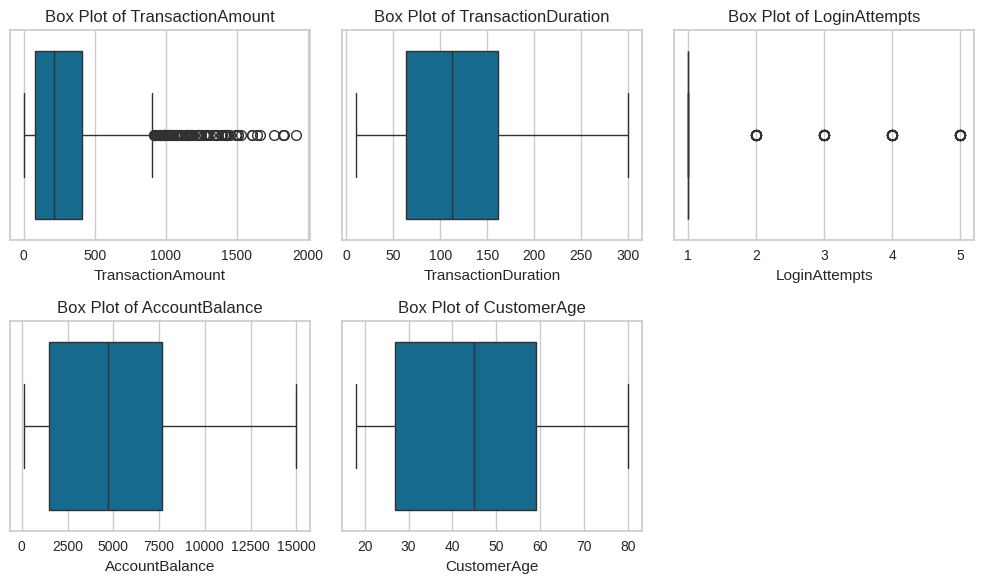

In [41]:
# Mengecek outliers pada data
numeric_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

plt.figure(figsize=(10, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=bank_transactions_df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [42]:
# Standardisasi fitur numerik
scaler = StandardScaler()

bank_transactions_df_std = pd.DataFrame(bank_transactions_df)

bank_transactions_df_std[numeric_features] = scaler.fit_transform(bank_transactions_df[numeric_features])

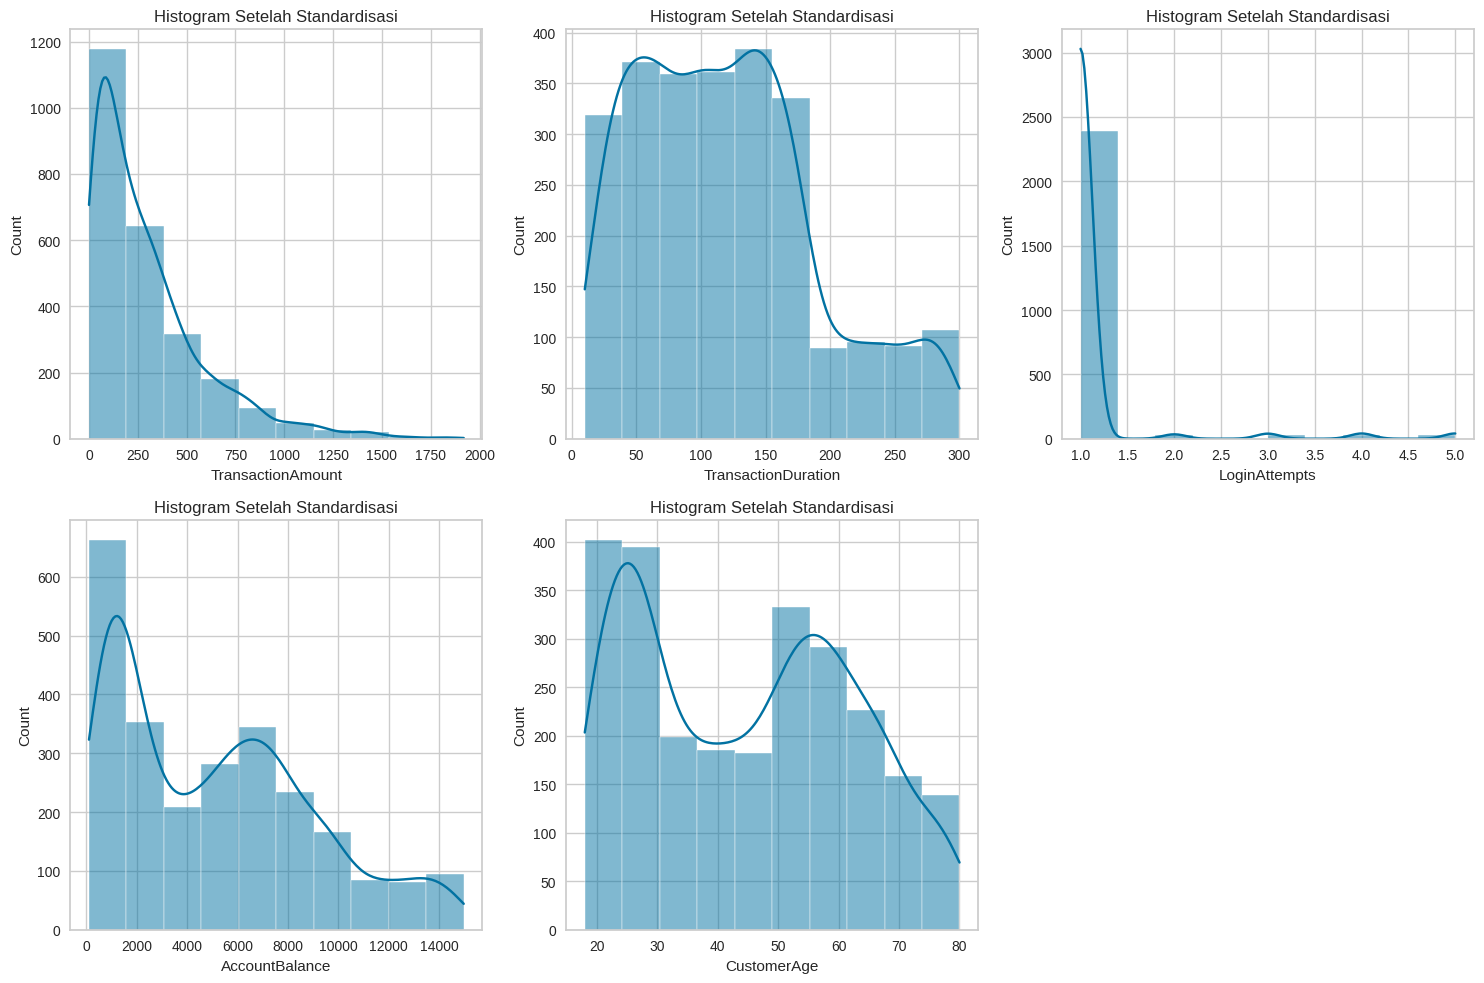

In [43]:
# Menampilkan histogram setelah dilakukan standardisasi
plot_histogram(numeric_features, title='Histogram Setelah Standardisasi')

In [44]:
# Memeriksa data kategorikal
category_features = bank_transactions_df.select_dtypes(include=['object']).columns

category_features

Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation'],
      dtype='object')

In [45]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
bank_transactions_df_lencoder = pd.DataFrame(bank_transactions_df_std)

categories = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for column in category_features:
    bank_transactions_df_lencoder[column] = label_encoder.fit_transform(bank_transactions_df_std[column])

# Menampilkan hasil
bank_transactions_df_lencoder

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,-0.971275,2023-04-11 16:29:14,1,36,365,186,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08
1,1,450,0.269440,2023-06-27 16:44:19,1,15,50,82,51,0,1.311287,0,0.305314,-0.206794,2.216472,2024-11-04 08:09:35
2,2,18,-0.586882,2023-07-10 18:16:08,1,23,229,343,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04
3,3,68,-0.387456,2023-05-05 16:32:11,1,33,182,300,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06
4,4,406,-0.973468,2023-10-16 17:51:24,0,1,298,501,90,2,-1.049768,3,1.120184,-0.206794,0.593589,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,293,1.913802,2023-04-26 17:09:36,0,7,605,325,71,1,-0.656259,0,-0.152156,-0.206794,1.942606,2024-11-04 08:11:29
2508,2508,318,-0.157779,2023-03-22 17:36:48,1,40,395,448,28,1,0.186975,0,0.819969,-0.206794,-1.245986,2024-11-04 08:11:42
2509,2509,93,-0.921462,2023-08-21 17:08:50,1,36,93,474,86,1,0.636700,2,0.376794,-0.206794,-0.443928,2024-11-04 08:08:39
2510,2510,116,-0.382420,2023-02-24 16:24:46,1,10,614,326,40,2,-1.218415,3,-1.438793,-0.206794,-0.855705,2024-11-04 08:12:22


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [46]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [47]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [48]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [49]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [50]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [51]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [52]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.